In [1]:
# implement Support Vector Machines 
# for classification and regression (SVCs and SVRs)
# can be applied for linear and non linear data 
# look for the best separating line or decision boundary 
# look for the largest margin, ==> to maximize the distance between the decision boundary and the points 
# SVMs can be trained into non-linear data (data which is not separable by a line )

# The kernel trick on SVMs : examples : Linear / polynomial / radial basis function (RBF) / Gaussian RBF / sigmoid ..
# ==> used to separate non-linear data by a line 

# here we're going to implement an a classification support vector with an RBF kernel to our cancer dataset 

 

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_breast_cancer 

cancer = load_breast_cancer()
X_train, X_test , y_train , y_test = train_test_split (cancer.data, cancer.target, random_state=0)
svm = SVC()
svm.fit(X_train,y_train)
print('Accuracy on the training subset: {:.3f}'.format(svm.score(X_train,y_train)))
print('Accuracy on the testing subset: {:.3f}'.format(svm.score(X_test,y_test)))

Accuracy on the training subset: 0.904
Accuracy on the testing subset: 0.937


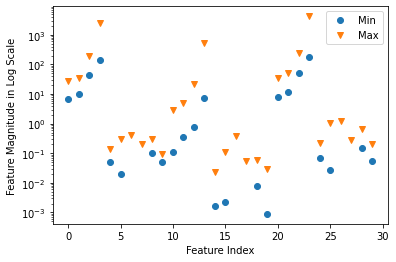

In [5]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.plot(X_train.min(axis=0),'o',label = 'Min' )
plt.plot(X_train.max(axis=0),'v',label = 'Max' )
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude in Log Scale')
plt.yscale('log')
plt.legend(loc='upper right')



In [6]:
# Implementing data scaling 
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)
X_train_scaled = (X_train - min_train)/range_train
print('Minimum per feature\n{}'.format(X_train_scaled.min(axis=0)))
print('Maximum per feature\n{}'.format(X_train_scaled.max(axis=0)))

Minimum per feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum per feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [7]:
X_test_scaled = (X_test - min_train)/range_train
svm = SVC()
svm.fit(X_train_scaled,y_train)
print('Accuracy on the training subset: {:.3f}'.format(svm.score(X_train_scaled,y_train)))
print('Accuracy on the testing subset: {:.3f}'.format(svm.score(X_test_scaled,y_test)))

Accuracy on the training subset: 0.984
Accuracy on the testing subset: 0.972


In [12]:
# C and gamma parameters both control the complexity of the model 
svm = SVC(C=20)
svm.fit(X_train_scaled,y_train)
print('Accuracy on the training subset: {:.3f}'.format(svm.score(X_train_scaled,y_train)))
print('Accuracy on the testing subset: {:.3f}'.format(svm.score(X_test_scaled,y_test)))


Accuracy on the training subset: 0.988
Accuracy on the testing subset: 0.979


In [ ]:
# Advantages of SVMs : 
# - they are versatile : it can do well on a very large range of datasets 
# - can build complexe decision boundaries on low-dimensional data
# - can work well on high-dimensional data with relatively small sample size 

# Weaker points : 
# don't perform well on high-dimensional data with many samples (>100K)
# preprocessing may be required => implies knowledge and understanding of hyper-parameters 
# harder to inspect and visualize ..

# Alternatives : DT and Random forests (require less/no preprocessing of data, easier to understand, inspect and visualize )

# Good practices 
# - Data scaling 
# - other preprocessing 
# - choosing an appropriate kernel 
# - tuning hyper-parameters: C, gamma ...